# Background
 In this project I will use my knowledge about building and tuning models to help a bank predict defaulters and non-defaulters on a loan. The bank wants to reward loans to individual they predict will pay them back. It is most harmful for the bank to predict an individual will pay the loan back on time, but the individual does not. This causes the bank to lose money and have to deal with 3rd party companies to try and get a portion of their money back. The provided dataset has 1,000 observations, and 17 features to explore to help build the best model with few false positives as possible . 

## Objectives 
• To predict those customers who might be a defaulter in paying back their loans

• Which features are the most important in the model-building process


## Dataset (credit.csv)

Data Dictionary:
1. **checking_balance**: the amount of money in customer's checking account
2. **months_loan_duration**: the length of the loan in months
3. **credit_history**: the history of an individuals' credit
4. **purpose**: the reason the loan is needed
5. **amount**: the amount of the loan 
6. **savings_balance**: balance in savings account 
7. **employment_duration**: how long an individual has been with their current employer
8. **percent_of_income**: installment rate in percentage of disposable income
9. **years_at_residence**: how long an individual has been at their current home
10. **age**: age in years
11. **other_credit**: installment plans with other companies
12. **housing**: housing ownership status 
13. **existing_loans_count**: number of other loans with this bank
14. **job**: employment status
15. **dependents**: number of people one is responsible for
16. **phone**: phone ownership status 
17. **default**: whether or not an individual defaulted on the loan or not


# Importing libraries 

In [1]:
import xgboost

In [2]:
#Library to clean column names 
from skimpy import clean_columns
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import io

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Uploading dataset

In [3]:
from google.colab import files 
uploaded = files.upload()

Saving credit.csv to credit (1).csv


## Reading and copying the data 

In [4]:
credit = pd.read_csv(io.BytesIO(uploaded['credit.csv']))


In [5]:
data = credit.copy()

#Viewing first and last 5 rows

In [6]:
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [11]:
data.tail()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes
999,1 - 200 DM,45,critical,car,4576,100 - 500 DM,unemployed,3,4,27,none,own,1,skilled,1,no,no


# Data shape 

In [12]:
data.shape

(1000, 17)

There are 1,000 observations and 17 features 

# Checking data types

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o



1.   Their are 10 categorical variables, and 7 numeric variables. 
2.   Their are no missing values. 



# Checking for duplicate variables

In [ ]:
#Checking for duplicate values. 
data[data.duplicated()].count()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

Observation:
There are no duplicate variables. 

## Summary of numerical features

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0



Observations:
1.   The average duration of a loan is 21 months. 
2.   There is a wide range in age from 19-75 years old. 
3. The average age is 36.
4. 75% of the data has 1 or less dependent. 
5. 75% of the dataset has an installment rate of 4% or lower. 



#EDA

## Univariate Anlysis 

### 1. Numerical Features

In this univariate analysis I will observe each numerical variable independently. I am looking for insight and patterns produced by the data. 

In [7]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(x=feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

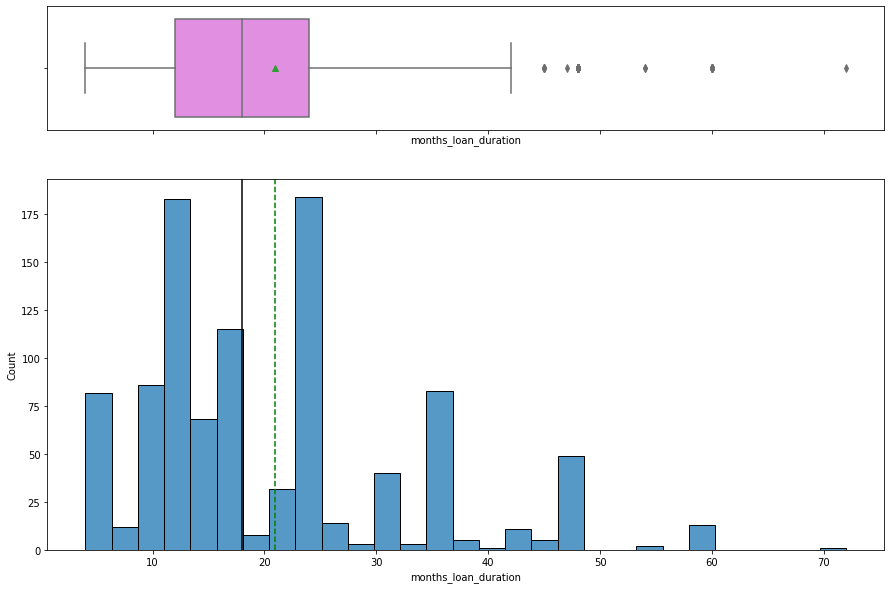

In [ ]:
histogram_boxplot(data['months_loan_duration'])

Observations: 
1. Loan duration is right skewed. 
2. There are a few outliers to the right.
3. The outlier all the way to the right of the chart indicates a rare case of someone having over 70 months(6 years) to repay a loan. 
 

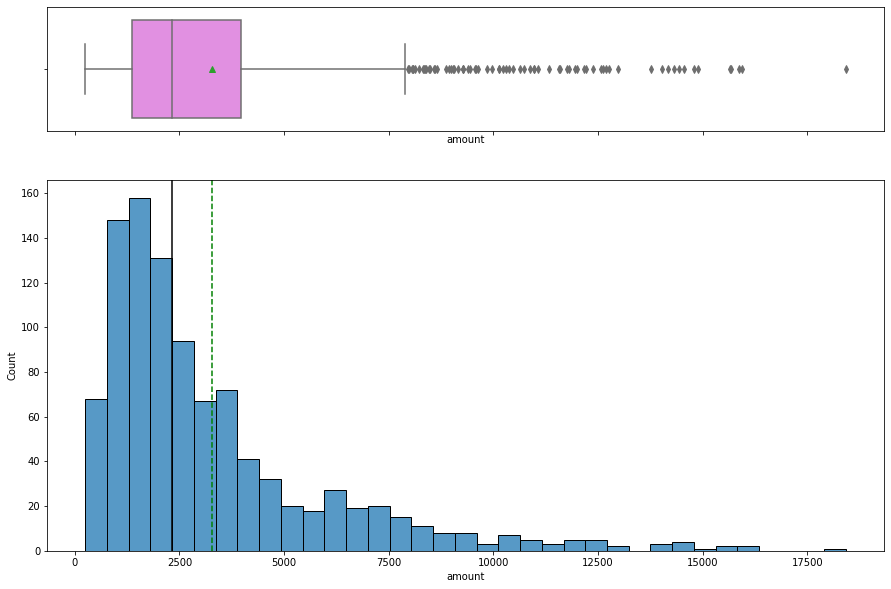

In [ ]:
histogram_boxplot(data['amount'])

Observations: 
1. The credit amount is right skewed. 
2. Majority of the dataset has less than average credit amount. 
3. Their are a few outliers showing the few individuals with higher credit amounts. 
4. One individual has a credit amount greater than 17,500. 

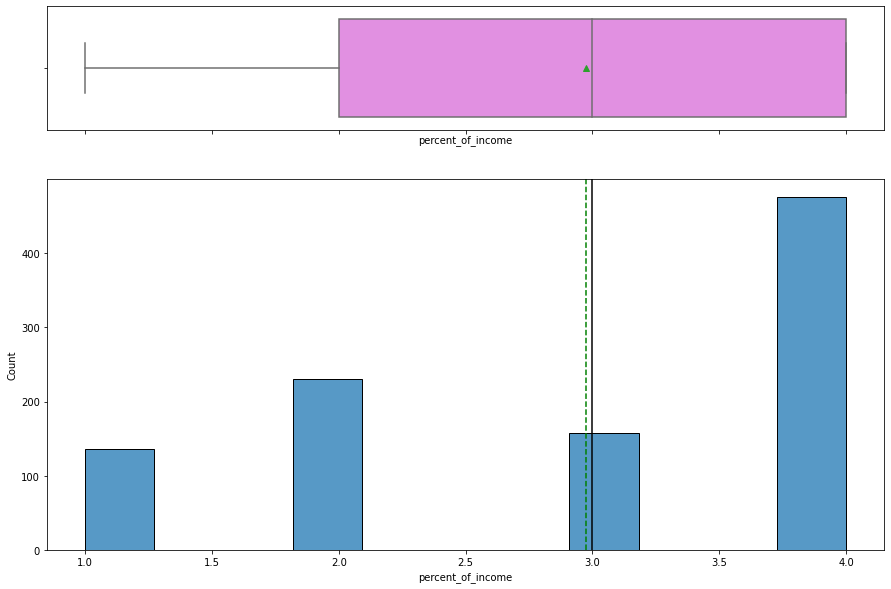

In [ ]:
histogram_boxplot(data['percent_of_income'])

Observations: 
1. Although this feature is numerical, but can be looked at as categorical. 
2. Their are 4 categories (1%, 2%, 3%, 4%). 
3. Most individuals have an installment rate in percentage of disposable income of 4%. 
4. The average installment rate is 3%. 

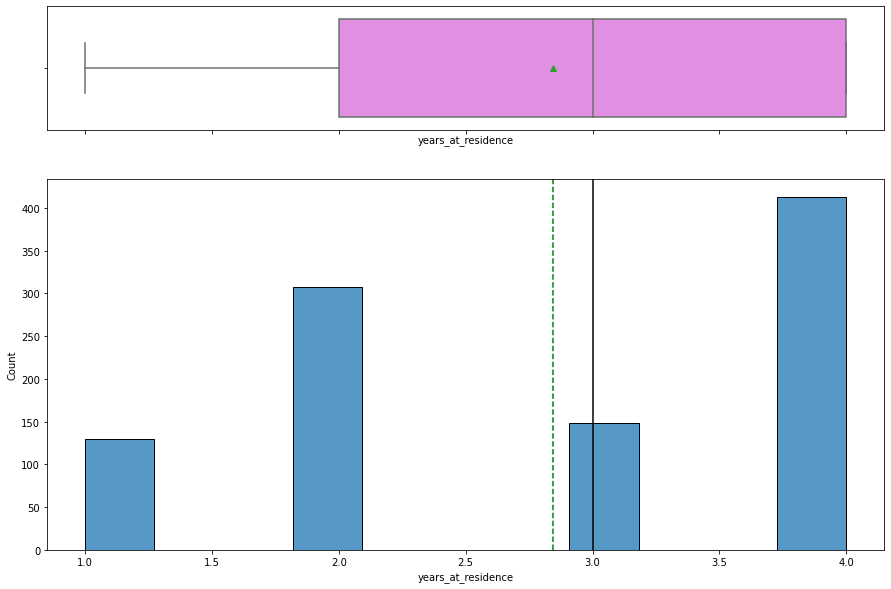

In [ ]:
histogram_boxplot(data['years_at_residence'])

Observations:
1. This feature is also numerical, and can be seen as categorical. 
2. Their are also 4 categories in this feature. 
3. Individuals in this dataset have lived on their current residence from 1-4 years. 
4. On average individuals have lived in their current resident for about 3 years. 


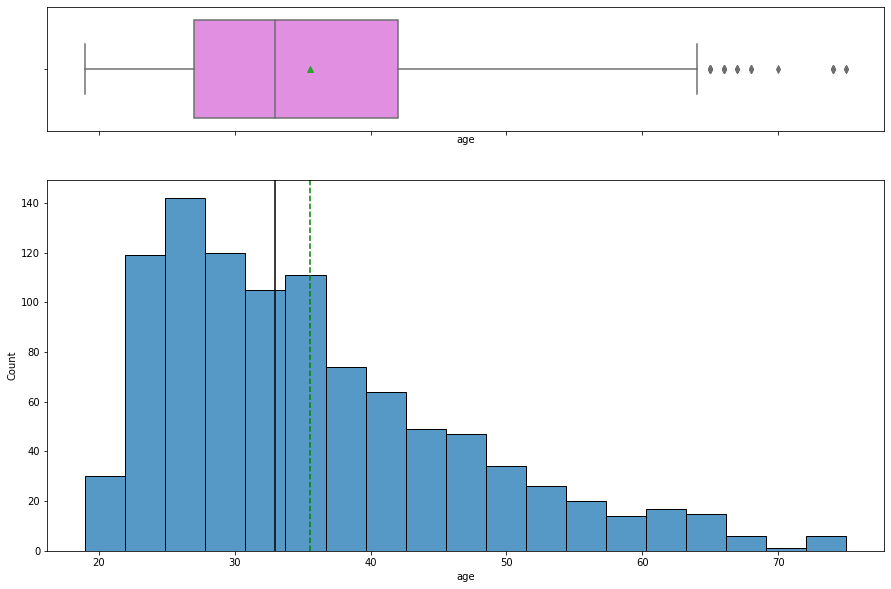

In [ ]:
histogram_boxplot(data['age'])

Observations: 
1. The age feature is right skewed indicating most individuals are under the age of 40.
2. The average age is 36. 
3. Not many people in this dataset are over the age of 70. 
4. Most people take out loans in their 20's based on this data. 
 

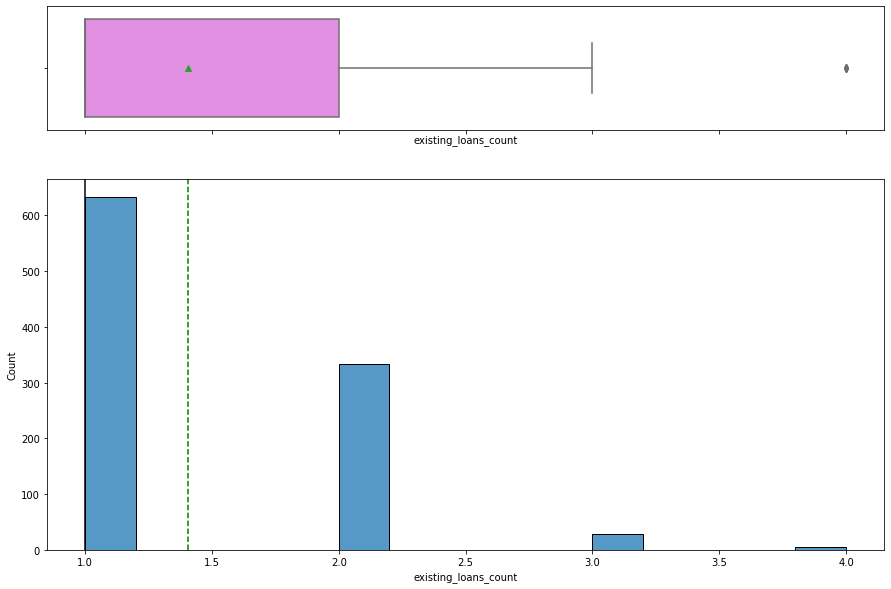

In [ ]:
histogram_boxplot(data['existing_loans_count'])

Observations: 
1. The numerical feature may also be seen as categorical. 
2. Their are 4 categories. 
3. Most individuals only have one loan. 
4. Very few people have 4 loans. 

### 2. Categorical Features

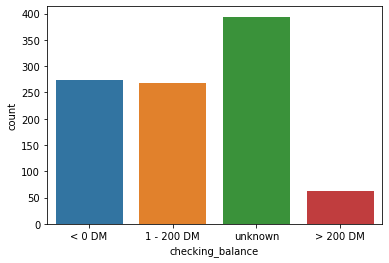

In [ ]:
# checking balance distribution 
checkbal = sns.countplot(data = data, x="checking_balance")

Observations:
1. Most individuals have no debit memo's on their checking account. 
2. Very few people have greater than 200 debit memo's. 

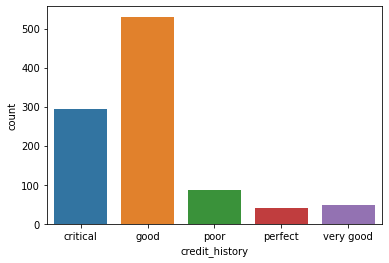

In [ ]:
# credit history distribution 
credhis = sns.countplot(data = data, x="credit_history")

Observations:
1. A high percentage of individuals have good credit, but few have very good credit. 
2. As expected "perfect" category has the least observations 

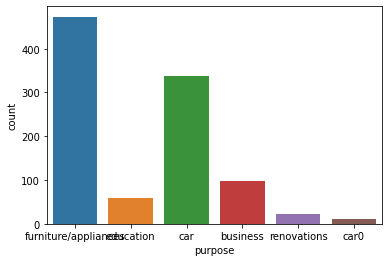

In [ ]:
# purpose distribution 
Purpose = sns.countplot(data = data, x="purpose")

Observations:
1. The most common purpose is applicances and furniture
2. The 2nd most common purpose is car. 

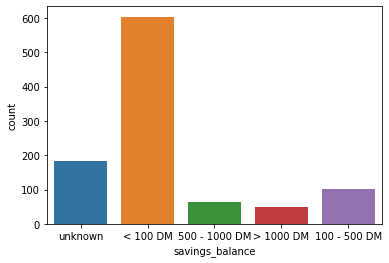

In [ ]:
# savings balance distribution 
savbal = sns.countplot(data = data, x="savings_balance")

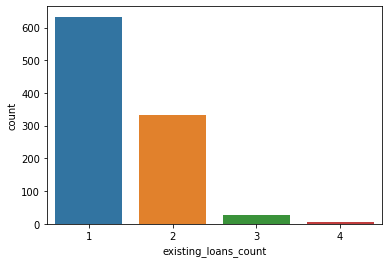

In [ ]:
# existing loans count distribution 
loancounts = sns.countplot(data = data, x="existing_loans_count")

Observations:
1. Most individuals only have 1 other loan with the bank. 
2. The bank most likely puts a limit on how many loans an individual can have a once. 
3. Not many people have 3 or more loans 

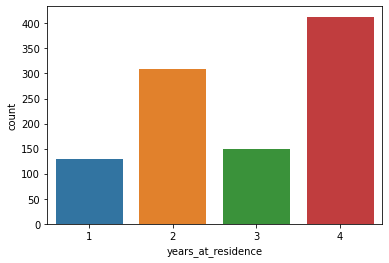

In [ ]:
# years at residence distribution 
years = sns.countplot(data = data, x="years_at_residence")

Observations: 
1. Most people have been at their residence for 4 years. 

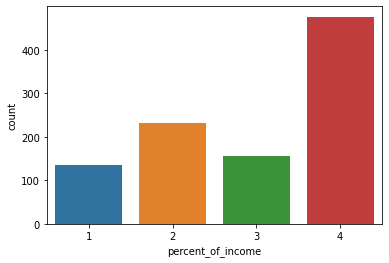

In [ ]:
# percent of income distribution 
incomepercent = sns.countplot(data = data, x="percent_of_income")

Observations:
1. Majority of the dataset has a 4% installment rate based on their disposable income. 

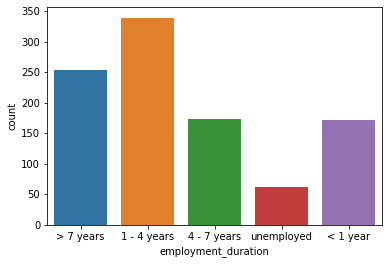

In [ ]:
# employment duration distribution 
employdur = sns.countplot(data = data, x="employment_duration")

Observations:
1. As expected not many people with bank accounts are unemployed.
2. Most individuals have been with their current employer 1-4 years.
3. Many individuals have also been with thier current employer for more than 7 years.  


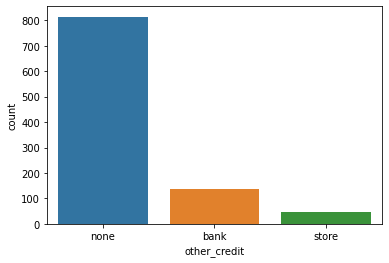

In [ ]:
# other credit distribution 
othercredit = sns.countplot(data = data, x="other_credit")

Observations:
1. Most individuals dont have installment plans with other companies, and very few people have one with a store. 

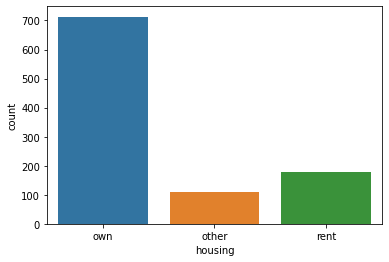

In [ ]:
# housing distribution 
house = sns.countplot(data = data, x="housing")

Observations:
1. A large portion of the dataset are homewoners. 

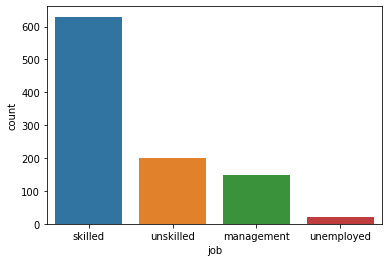

In [ ]:
# job distribution 
Job = sns.countplot(data = data, x="job")

Observations:
1. Skilled individuals are more likely to bank with this bank, instead of unskilled individuals. 

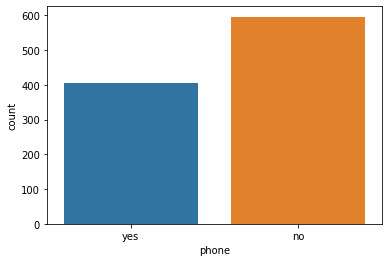

In [ ]:
# phone distribution 
Phone = sns.countplot(data = data, x="phone")

Observation:
1. Majority of individuals do not have a phone registered in their name. 

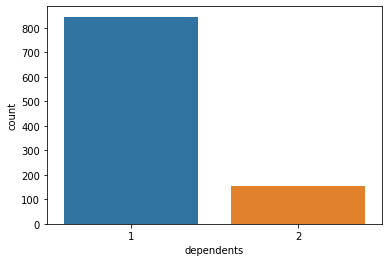

In [ ]:
# dependents distribution 
Dependents = sns.countplot(data = data, x="dependents")

Observations:
1. The dataset consist of individuals with 1 to 2 dependents.
2. Most individuals only have 1 dependent. 

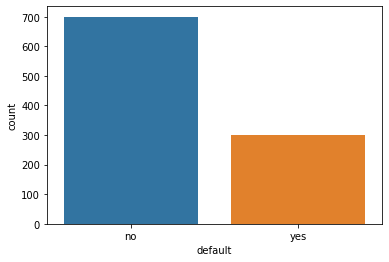

In [ ]:
# default distribution 
Default = sns.countplot(data = data, x="default")

Observations:
1. Majority of the dataset did not default on the loan. 
2. 70% of individuals did not default, and 30% did default. 

In [ ]:
data['default'].value_counts()

no     700
yes    300
Name: default, dtype: int64

## Bivariate Analysis

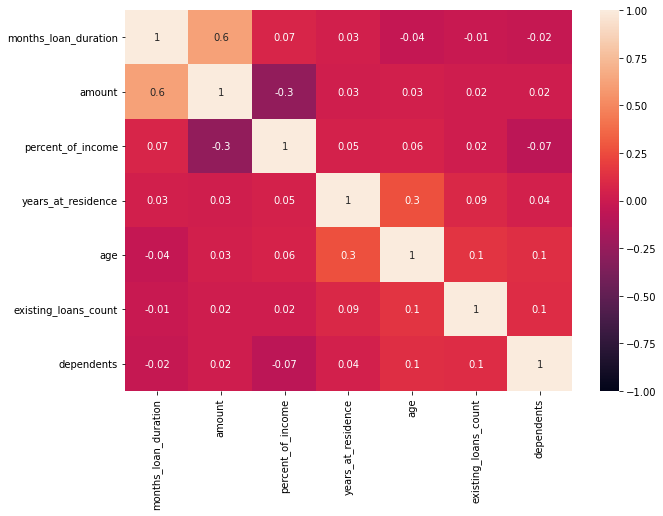

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g')
plt.show()

Observations:
1. Majority of the numerical features do not have high correlation with one another.
2. The amount of the loan and the duration of the loan have a high positive correlation. 

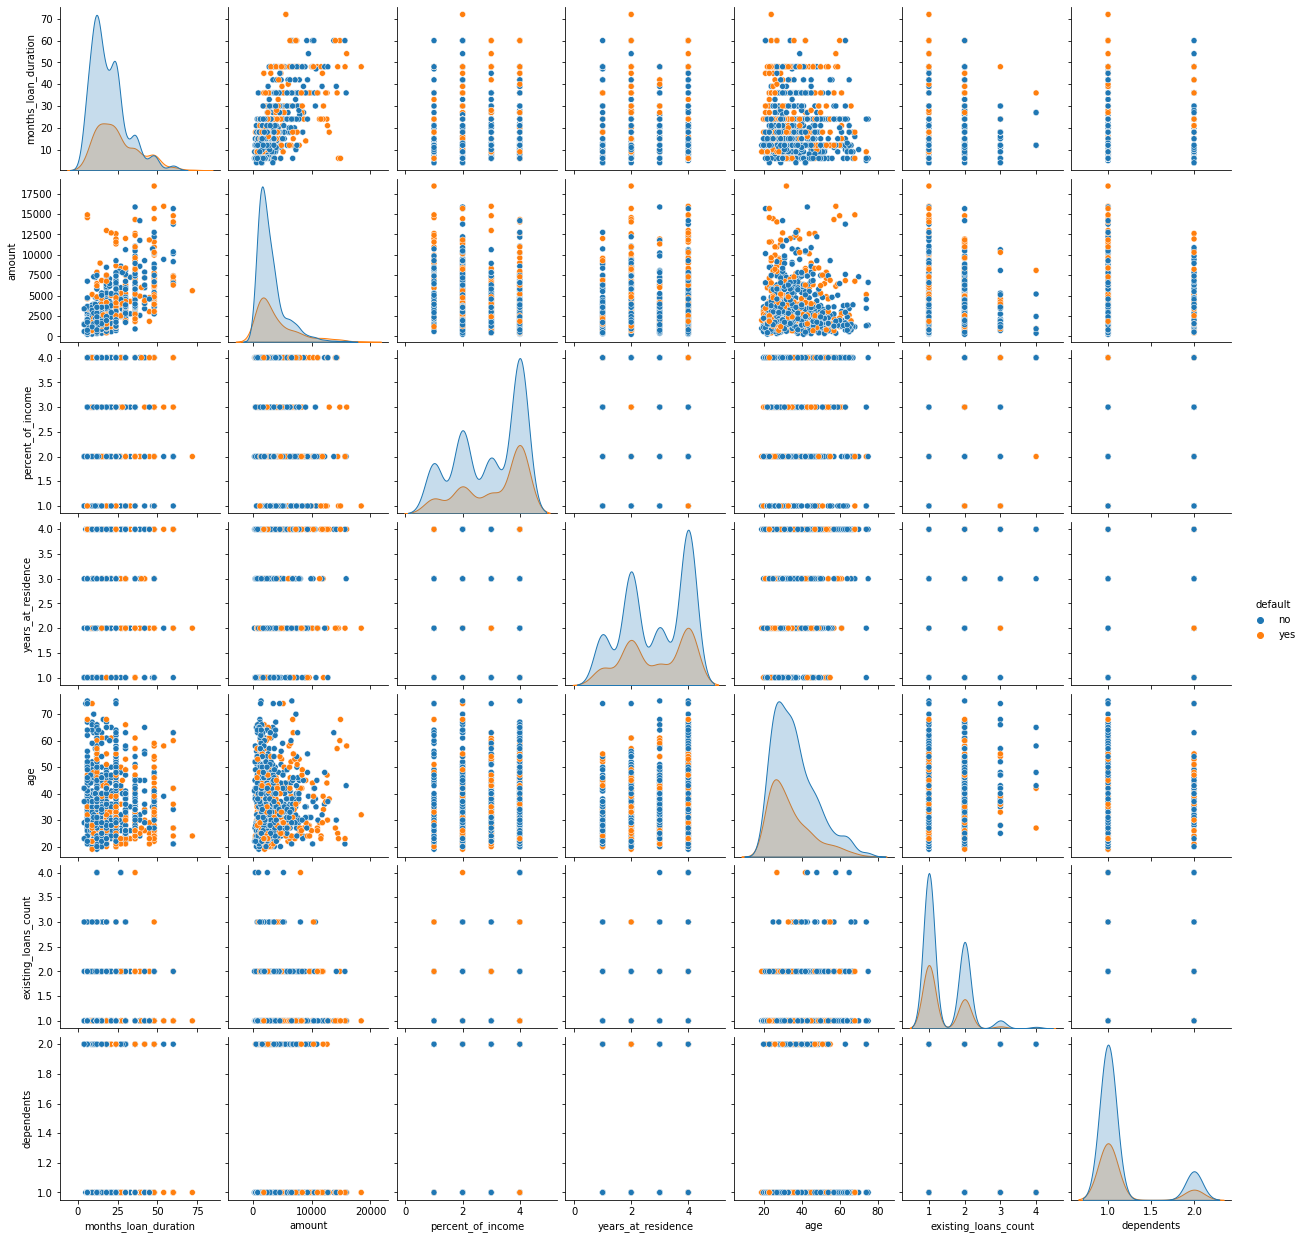

In [ ]:
sns.pairplot(data,hue='default')
plt.show()

Observation:
* There are overlaps in the distribution of variables for both the classes. Let's explore this further using other plots.

In [8]:
## function to plot boxplots w.rt quality
def boxplot(x):
    plt.figure(figsize=(7,5))
    sns.boxplot(data['default'],x,palette="PuBu")
    plt.show()

## Age vs. Default

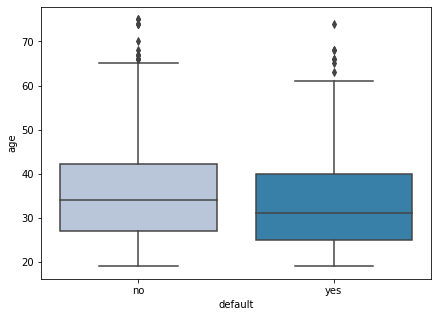

In [ ]:
boxplot(data['age'])

Observations:
1. The two features show very little correlation, as both individuals who have
defaulted and individuals who have not fall into the same age range

## Amount vs. Default 

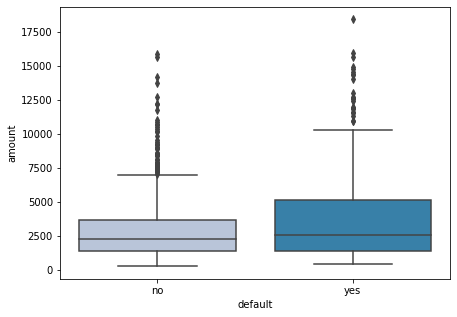

In [ ]:
boxplot(data['amount'])

Observations:
1. Their are some outliers.
2. Individuals who defaulted had higher loan amounts.
3. Their is a positive correlation between the two features. 

## Loan Duration vs. Default

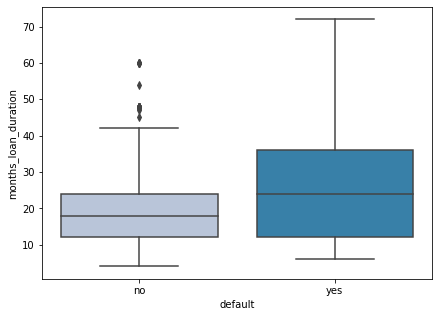

In [ ]:
boxplot(data['months_loan_duration'])

Observations:
1. In most cases individuals with longer time to pay the loan off have defaluted. 
2. Their is a correlation between the two features. 

## Categorical Features

In [9]:
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["default"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["default"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

## Checking balance vs. Default

default            no  yes   All
checking_balance                
1 - 200 DM        164  105   269
< 0 DM            139  135   274
> 200 DM           49   14    63
unknown           348   46   394
All               700  300  1000
------------------------------------------------------------------------------------------------------------------------


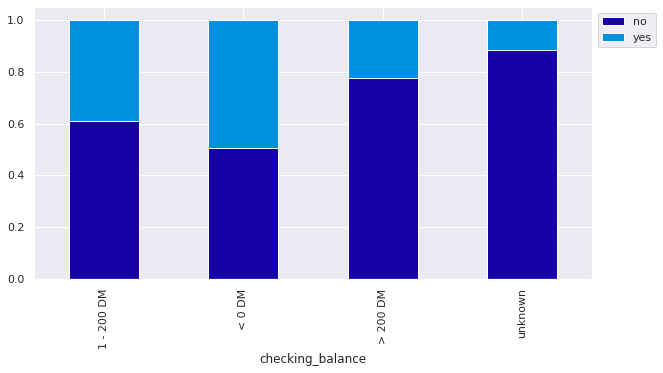

In [ ]:
stacked_plot(data['checking_balance'])

observations:
1. Each category has mostly individuals who have not defaulted on the loan.
2. Unknown is the largest category and 90% of this category did not default. 

## Credit history vs. Default

default          no  yes   All
credit_history                
critical        243   50   293
good            361  169   530
perfect          15   25    40
poor             60   28    88
very good        21   28    49
All             700  300  1000
------------------------------------------------------------------------------------------------------------------------


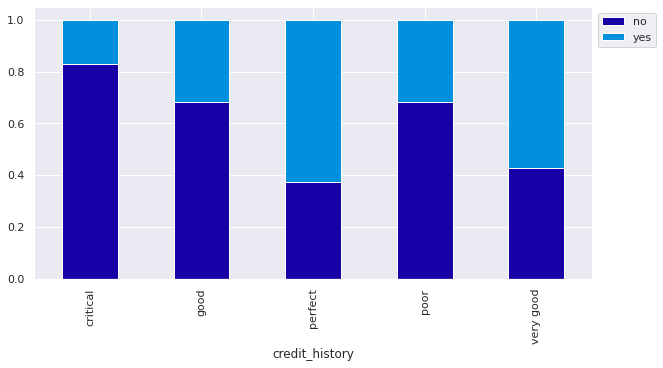

In [ ]:
stacked_plot(data['credit_history'])

Observations:
1. Of the individuals with perfect credit 37% are non-defaulters and 63% are defaulters. 
2. Of the individuals with poor credit 68% are non-defaulters, and 32% are defaulters.
3. The vast majority of individuals with critical credit did not default. 



## Dependents vs. Default

default      no  yes   All
dependents                
1           591  254   845
2           109   46   155
All         700  300  1000
------------------------------------------------------------------------------------------------------------------------


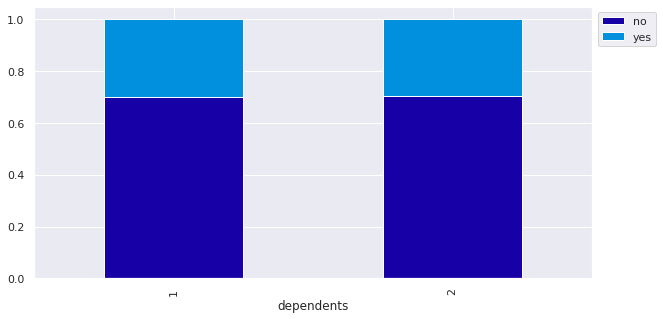

In [ ]:
stacked_plot(data['dependents'])

Observations:
1. The maximum number of dependents in this dataset is 2.
2. 85% of the dataset has only 1 dependent.
3. Their is no correlation between dependents and default status. 


## Housing vs. Default

default   no  yes   All
housing                
other     64   44   108
own      527  186   713
rent     109   70   179
All      700  300  1000
------------------------------------------------------------------------------------------------------------------------


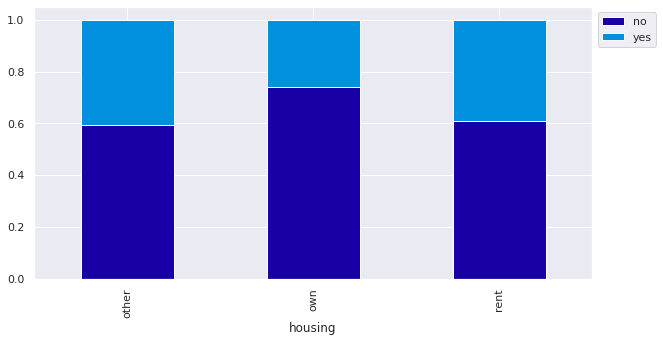

In [ ]:
stacked_plot(data['housing'])

Observations:
1. Majority of the dataset are homeowners. 
2. A higher percentage of homeowners did not default on the loan than home renters, and others. 

## Phone vs. Default 

default   no  yes   All
phone                  
no       409  187   596
yes      291  113   404
All      700  300  1000
------------------------------------------------------------------------------------------------------------------------


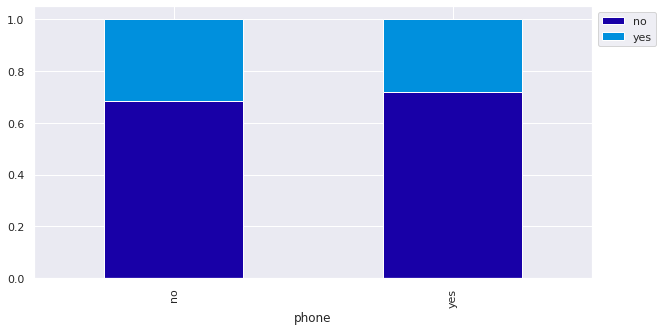

In [ ]:
stacked_plot(data['phone'])

Observations:
1. Most individuals do not have a phone registered in their name. 
2. The is not true correlation between the two features. 

## Job vs. Default

default      no  yes   All
job                       
management   97   51   148
skilled     444  186   630
unemployed   15    7    22
unskilled   144   56   200
All         700  300  1000
------------------------------------------------------------------------------------------------------------------------


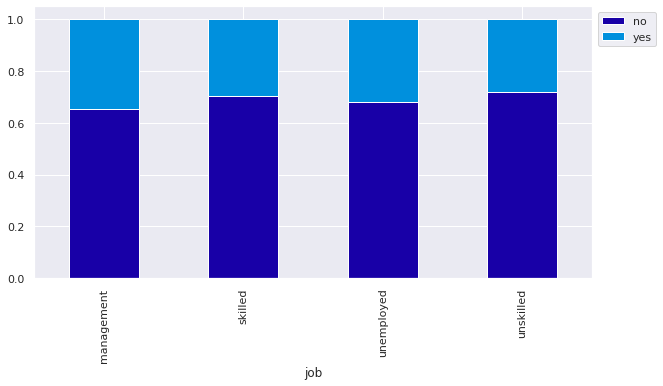

In [ ]:
stacked_plot(data['job'])

Observations:
1. Their is no correlation.

## Other credit vs. Default

default        no  yes   All
other_credit                
bank           82   57   139
none          590  224   814
store          28   19    47
All           700  300  1000
------------------------------------------------------------------------------------------------------------------------


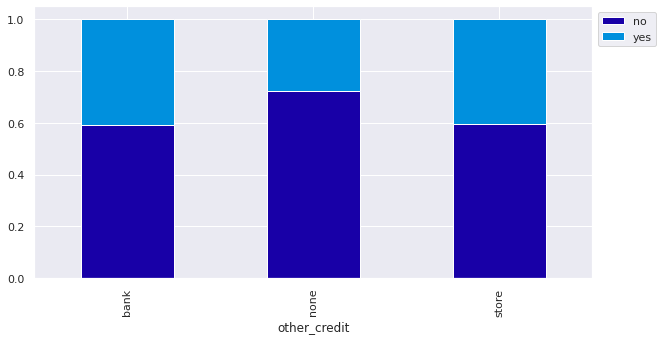

In [ ]:
stacked_plot(data['other_credit'])

## Purpose vs. Default

default                no  yes   All
purpose                             
business               63   34    97
car                   231  106   337
car0                    7    5    12
education              36   23    59
furniture/appliances  349  124   473
renovations            14    8    22
All                   700  300  1000
------------------------------------------------------------------------------------------------------------------------


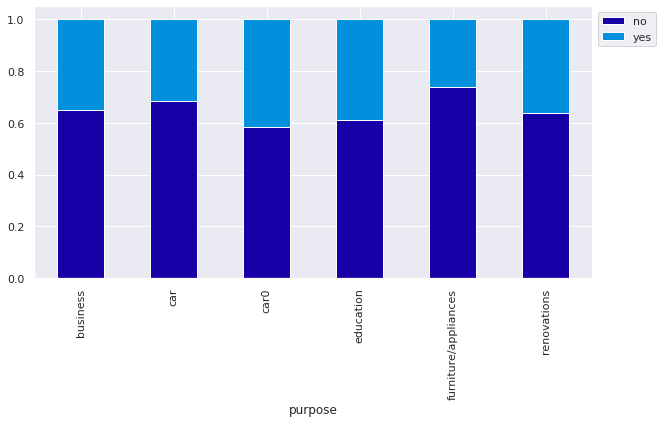

In [ ]:
stacked_plot(data['purpose'])

Observation:
1. Individuals getting loans for furniture/appliances are slightly more likely to pay the loan back than others. 


## Savings balance vs. Default

default           no  yes   All
savings_balance                
100 - 500 DM      69   34   103
500 - 1000 DM     52   11    63
< 100 DM         386  217   603
> 1000 DM         42    6    48
unknown          151   32   183
All              700  300  1000
------------------------------------------------------------------------------------------------------------------------


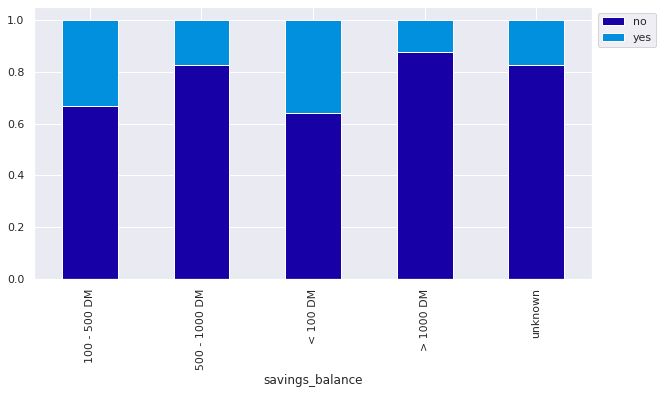

In [ ]:
stacked_plot(data['savings_balance'])

## Existing loan count vs. Default

default                no  yes   All
existing_loans_count                
1                     433  200   633
2                     241   92   333
3                      22    6    28
4                       4    2     6
All                   700  300  1000
------------------------------------------------------------------------------------------------------------------------


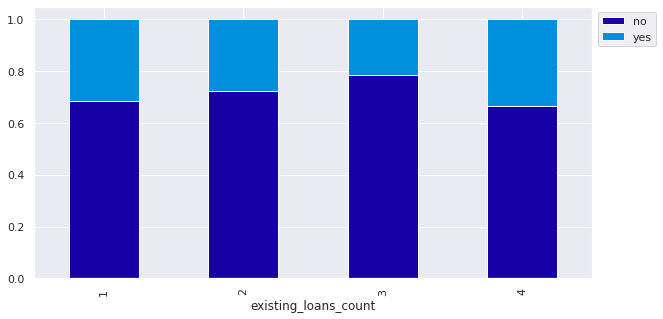

In [ ]:
stacked_plot(data['existing_loans_count'])

Observations:
1. It is rare that someone has 3 or 4 existing loans. 
2. No strong correlation between the two features. 


## Years at residence vs. Default

default              no  yes   All
years_at_residence                
1                    94   36   130
2                   211   97   308
3                   106   43   149
4                   289  124   413
All                 700  300  1000
------------------------------------------------------------------------------------------------------------------------


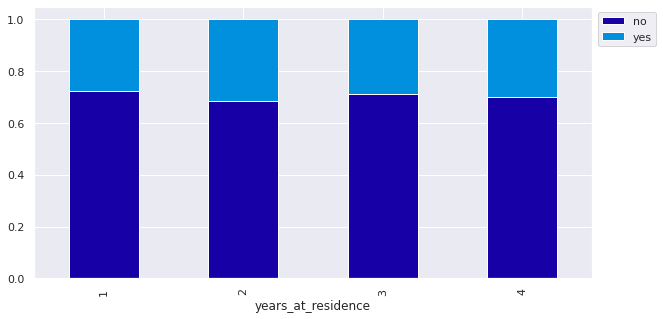

In [ ]:
stacked_plot(data['years_at_residence'])

Observations:
1. No strong correlations between the variables.

## Percent of income vs. Default

default             no  yes   All
percent_of_income                
1                  102   34   136
2                  169   62   231
3                  112   45   157
4                  317  159   476
All                700  300  1000
------------------------------------------------------------------------------------------------------------------------


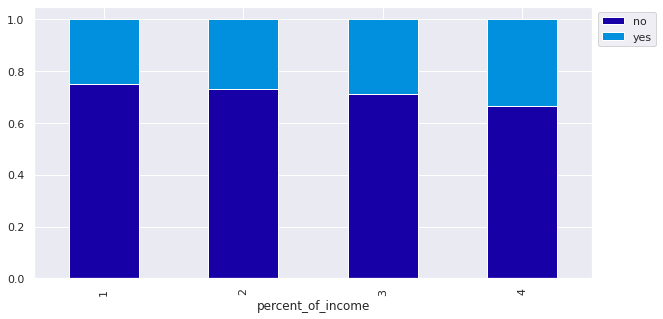

In [ ]:
stacked_plot(data['percent_of_income'])

## Observations:
1. 16% of individuals with a 4% installment rate have defaulted.
2. Less than 1% of individuals with a 1% installment rate have defaulted.

## Employment duration vs. Default

default               no  yes   All
employment_duration                
1 - 4 years          235  104   339
4 - 7 years          135   39   174
< 1 year             102   70   172
> 7 years            189   64   253
unemployed            39   23    62
All                  700  300  1000
------------------------------------------------------------------------------------------------------------------------


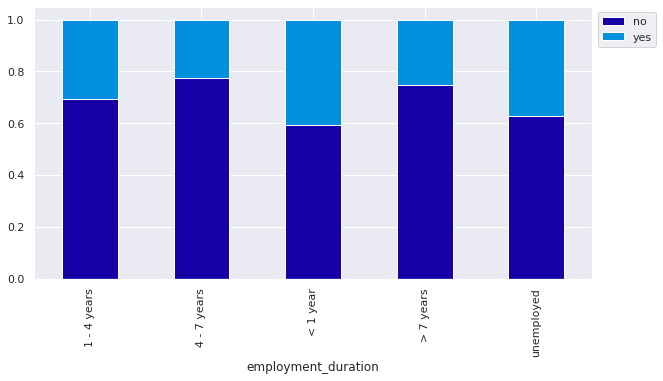

In [ ]:
stacked_plot(data['employment_duration'])

# Data Pre-processing 
Taking care of the following:

1. Missing values
2. Dropping any features that are not effective in model building process and don't add any new knowledge 
3. Handling non-numerical values (categorical)

In [55]:
#Check for missing values
data.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

No missing values.

### Handling non-numerical values (categorical)

In [10]:
# creating dummy varibles
dummy_data = pd.get_dummies(
    data,
    columns=[
        "checking_balance",
        "credit_history",
        "purpose",
        "savings_balance",
        "employment_duration",
        "other_credit",
        "housing", 
        "job",
        "phone"
    ],
    drop_first=True,
)
dummy_data.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_< 0 DM,checking_balance_> 200 DM,...,employment_duration_> 7 years,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled,phone_yes
0,6,1169,4,4,67,2,1,no,1,0,...,1,0,1,0,1,0,1,0,0,1
1,48,5951,2,2,22,1,1,yes,0,0,...,0,0,1,0,1,0,1,0,0,0
2,12,2096,2,3,49,1,2,no,0,0,...,0,0,1,0,1,0,0,0,1,0
3,42,7882,2,4,45,1,2,no,1,0,...,0,0,1,0,0,0,1,0,0,0
4,24,4870,3,4,53,2,2,yes,1,0,...,0,0,1,0,0,0,1,0,0,0


Observations:
1. The dummy variables allow the categorical variables to be included in the models. 
2. The observations for those categorical columns are now columns with intergers. 
3. The column names need to be cleaned up.

## Clean up the column names 

In [15]:
dummy_data = clean_columns(dummy_data)

In [16]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   months_loan_duration            1000 non-null   int64 
 1   amount                          1000 non-null   int64 
 2   percent_of_income               1000 non-null   int64 
 3   years_at_residence              1000 non-null   int64 
 4   age                             1000 non-null   int64 
 5   existing_loans_count            1000 non-null   int64 
 6   dependents                      1000 non-null   int64 
 7   default                         1000 non-null   object
 8   checking_balance_0_dm           1000 non-null   uint8 
 9   checking_balance_200_dm         1000 non-null   uint8 
 10  checking_balance_unknown        1000 non-null   uint8 
 11  credit_history_good             1000 non-null   uint8 
 12  credit_history_perfect          1000 non-null   u

Observations:
1. All of the symbols in the column names have been cleaned up and replaced with '_'.
2. All of the columns are now intergers except for the target variable. 

# Model Building Approach
1. Data preparation
2. Split the data into train and test set
3. Build a CART (Classification and regression trees) model on the train data
4. Tune the model and prune the tree, if required
5. Test the data on test set

In [17]:
column_names = list(dummy_data.columns)
column_names.remove(
    "default"
)  # Keep only names of features by removing the name of target variable
feature_names = column_names
print(feature_names)

['months_loan_duration', 'amount', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents', 'checking_balance_0_dm', 'checking_balance_200_dm', 'checking_balance_unknown', 'credit_history_good', 'credit_history_perfect', 'credit_history_poor', 'credit_history_very_good', 'purpose_car', 'purpose_car_0', 'purpose_education', 'purpose_furniture_appliances', 'purpose_renovations', 'savings_balance_500_1000_dm', 'savings_balance_100_dm', 'savings_balance_1000_dm', 'savings_balance_unknown', 'employment_duration_4_7_years', 'employment_duration_1_year', 'employment_duration_7_years', 'employment_duration_unemployed', 'other_credit_none', 'other_credit_store', 'housing_own', 'housing_rent', 'job_skilled', 'job_unemployed', 'job_unskilled', 'phone_yes']


# Split Data

In [18]:
X = dummy_data.drop('default', axis=1)
y = dummy_data['default'].apply(lambda x : 0 if x=='no' else 1 )

In [19]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(700, 35) (300, 35)


In [56]:
y_train.value_counts(1)

0    0.7
1    0.3
Name: default, dtype: float64

In [21]:
y_test.value_counts(1)

0    0.7
1    0.3
Name: default, dtype: float64

The test and training set have the same distribution.

## Model evaluation criterion

### Model can make wrong predictions if:
1. Predicting an individual will not default and they actually default. 
2. Predicting an individual will defalut and they actually don't.

### Which case is more important? 
1. If the model predicts an individual will not default, but they actually defalut the bank lose money. 
2. If the model predicts an individual will default but they actually don't the bank will make more money than they may have predicted.

### Which metric is important to optimize?
1. The dataset is imbalanced(70,30), therefore we would want F1-Score to be maximized
2. The greater the F1-Score, the higher the chances for the model to predict both classes correctly.

## Functions for metric scores and confusion matrix

In [22]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [23]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Decision Tree Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.6733333333333333
Recall on training set :  1.0
Recall on test set :  0.37777777777777777
Precision on training set :  1.0
Precision on test set :  0.4473684210526316
F1-Score on training set :  1.0
F1-Score on test set :  0.40963855421686746


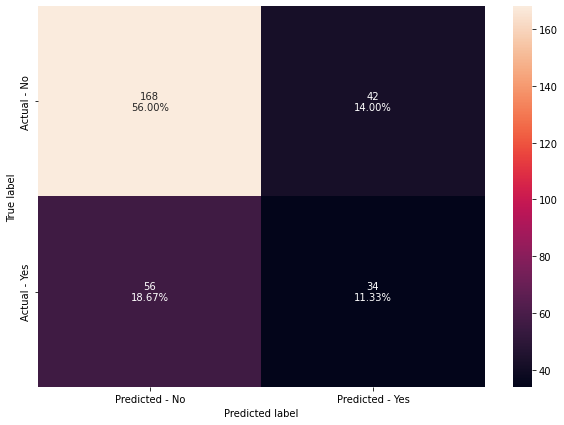

In [25]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

Observations:
1. The training set metric scores are all one, which indicates an overfit model.
2. Next we will try tuning the model with hyperparameters. 

### Hyperparameter Tuning

In [26]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=2,
                       max_leaf_nodes=5, min_impurity_decrease=0.0001,
                       random_state=1)

Accuracy on training set :  0.6328571428571429
Accuracy on test set :  0.64
Recall on training set :  0.8333333333333334
Recall on test set :  0.8444444444444444
Precision on training set :  0.44080604534005036
Precision on test set :  0.4470588235294118
F1-Score on training set :  0.5766062602965404
F1-Score on test set :  0.5846153846153846


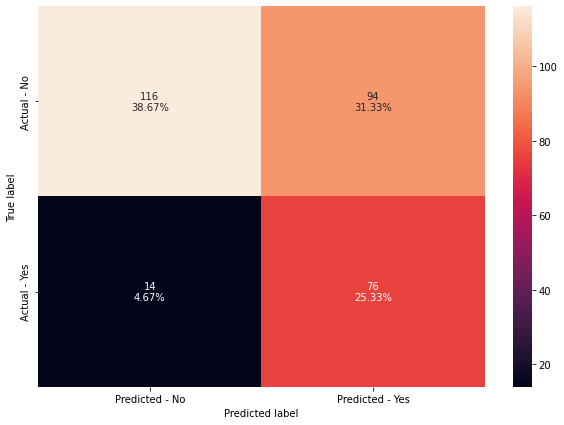

In [27]:
get_metrics_score(dtree_estimator)

make_confusion_matrix(dtree_estimator,y_test)

Observations: 
1. Adding the classweight parameter has helped decrease the overfiting in the previous model. 
2. This model shows less difference between training and test sets for each metric score. 
3. The test F-1 score has increased.  
4. Next we will try a random forest model.

## Random Forest Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.7633333333333333
Recall on training set :  1.0
Recall on test set :  0.34444444444444444
Precision on training set :  1.0
Precision on test set :  0.7209302325581395
F1-Score on training set :  1.0
F1-Score on test set :  0.4661654135338345


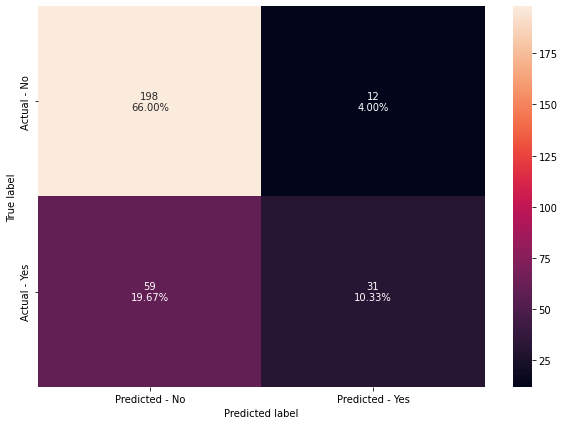

In [28]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

Observations:
1. This model is also overfit. 
2. The confusion matrix shows a high percentage of true positive.
3. The F-1 score decreased. 
4. In the next model we will try tunning the random forest model with hyperparameters.  

### Hyperparameter Tuning

In [29]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=25,
                       max_features='sqrt', min_samples_split=12,
                       n_estimators=70, oob_score=True, random_state=1)

Accuracy on training set :  0.8814285714285715
Accuracy on test set :  0.7133333333333334
Recall on training set :  0.9809523809523809
Recall on test set :  0.7111111111111111
Precision on training set :  0.7228070175438597
Precision on test set :  0.5161290322580645
F1-Score on training set :  0.8323232323232322
F1-Score on test set :  0.5981308411214953


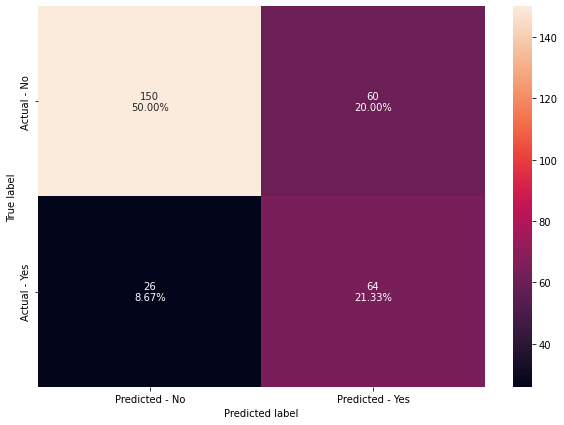

In [36]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

Observations: 
1. The model is now less overfit. 
2. Accuracy taining and test set have the least amount of difference.


## Bagging Classifier

Accuracy on training set :  0.9871428571428571
Accuracy on test set :  0.7166666666666667
Recall on training set :  0.9571428571428572
Recall on test set :  0.34444444444444444
Precision on training set :  1.0
Precision on test set :  0.543859649122807
F1-Score on training set :  0.9781021897810218
F1-Score on test set :  0.4217687074829932


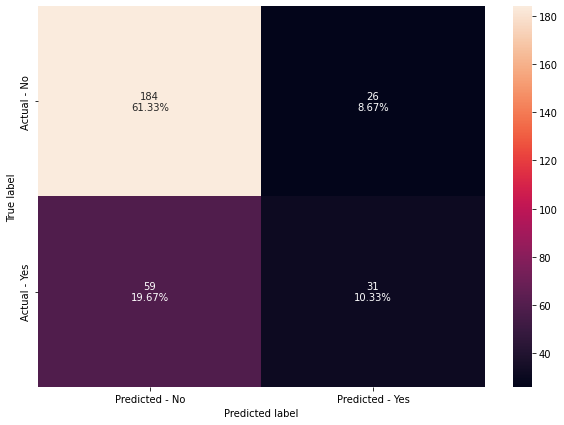

In [32]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

Observations:
1. The model is overfit.
2. None of the metric scores are showing good results. 
3. Let's try tuning the bagging model.

### Hyperparameter Tuning

In [33]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=20,
                  random_state=1)

Accuracy on training set :  0.9785714285714285
Accuracy on test set :  0.75
Recall on training set :  0.9285714285714286
Recall on test set :  0.3888888888888889
Precision on training set :  1.0
Precision on test set :  0.6363636363636364
F1-Score on training set :  0.962962962962963
F1-Score on test set :  0.4827586206896552


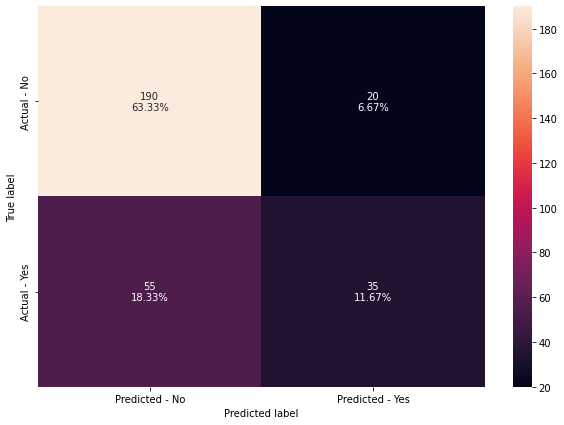

In [57]:
#Calculating different metrics
get_metrics_score(bagging_estimator_tuned)

#Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned,y_test)

Observation:
1. The model did not improve very much.

## AdaBoost Classifier

Accuracy on training set :  0.8
Accuracy on test set :  0.74
Recall on training set :  0.5571428571428572
Recall on test set :  0.5222222222222223
Precision on training set :  0.7134146341463414
Precision on test set :  0.573170731707317
F1-Score on training set :  0.625668449197861
F1-Score on test set :  0.5465116279069768


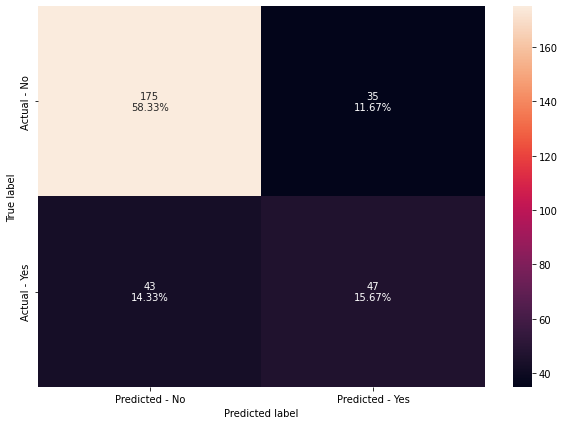

In [38]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

Observation:
1. Adaboost improved the model some, and helped with overfitting, but the f-1 score is still too low. 
2. Next we will try tuning the model. 


### Hyperparameter Tuning

In [39]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.7000000000000001, n_estimators=30,
                   random_state=1)

Accuracy on training set :  0.8742857142857143
Accuracy on test set :  0.7033333333333334
Recall on training set :  0.6857142857142857
Recall on test set :  0.4777777777777778
Precision on training set :  0.8674698795180723
Precision on test set :  0.5058823529411764
F1-Score on training set :  0.7659574468085107
F1-Score on test set :  0.4914285714285714


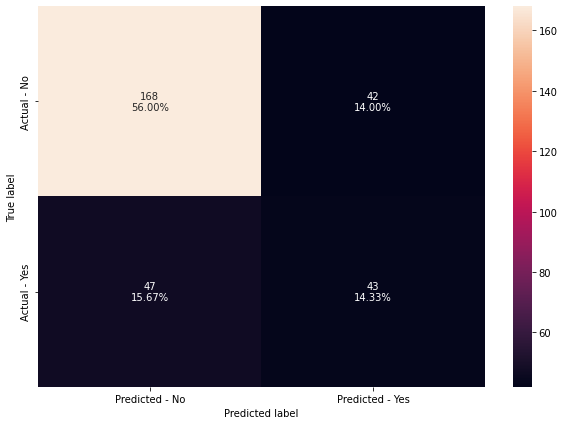

In [40]:
#Calculating different metrics
get_metrics_score(abc_tuned)

#Creating confusion matrix
make_confusion_matrix(abc_tuned,y_test)

Observation:
1. The model performance has decreased slightly.
2. False positives and negatives have slightly increased. 
3. f-1 score decreased.
4. The difference between the f-1 training and test set score has increased. 

## Gradient Boosting Classifier

Accuracy on training set :  0.9085714285714286
Accuracy on test set :  0.7266666666666667
Recall on training set :  0.7380952380952381
Recall on test set :  0.37777777777777777
Precision on training set :  0.9451219512195121
Precision on test set :  0.5666666666666667
F1-Score on training set :  0.8288770053475936
F1-Score on test set :  0.4533333333333333


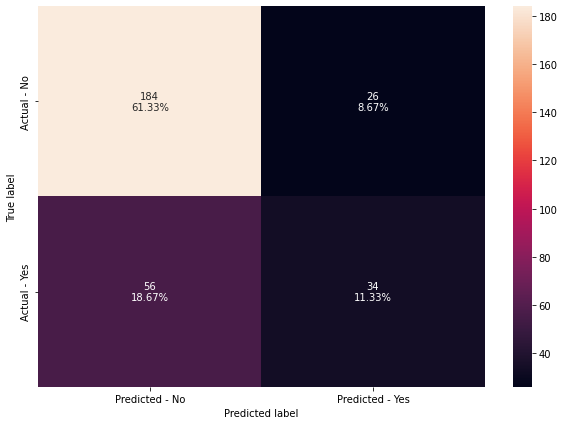

In [41]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

Observation:
1. The gradient boosting classifier without hyperparameters shows an increase in false positives. 
2. The f-1 score is too low. 
3. None of the metric scores show good results. 

### Hyperparameter Tuning

In [42]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=1)

Accuracy on training set :  0.9742857142857143
Accuracy on test set :  0.75
Recall on training set :  0.919047619047619
Recall on test set :  0.4777777777777778
Precision on training set :  0.9948453608247423
Precision on test set :  0.6056338028169014
F1-Score on training set :  0.9554455445544555
F1-Score on test set :  0.5341614906832298


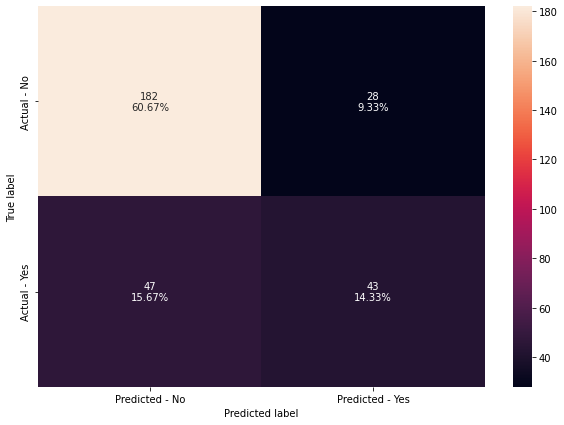

In [43]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

Observation:
* There is not much difference in the model performance after hyperparameter tuning.

## XGBoost Classifier

Accuracy on training set :  0.88
Accuracy on test set :  0.7466666666666667
Recall on training set :  0.6523809523809524
Recall on test set :  0.4
Precision on training set :  0.9256756756756757
Precision on test set :  0.6206896551724138
F1-Score on training set :  0.76536312849162
F1-Score on test set :  0.4864864864864865


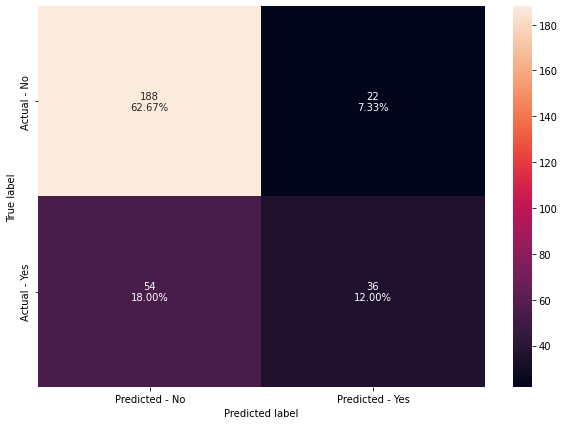

In [44]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

Observation:
* Xgboost classifier produces a low test f-1 score.
* Let's try hyperparameter tuning and see if the model performance improves.  

### Hyperparameter Tuning

In [45]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.7, eval_metric='logloss', learning_rate=0.2,
              n_estimators=50, random_state=1, scale_pos_weight=2,
              subsample=0.9)

Accuracy on training set :  0.8871428571428571
Accuracy on test set :  0.72
Recall on training set :  0.861904761904762
Recall on test set :  0.6222222222222222
Precision on training set :  0.7835497835497836
Precision on test set :  0.5283018867924528
F1-Score on training set :  0.8208616780045351
F1-Score on test set :  0.5714285714285715


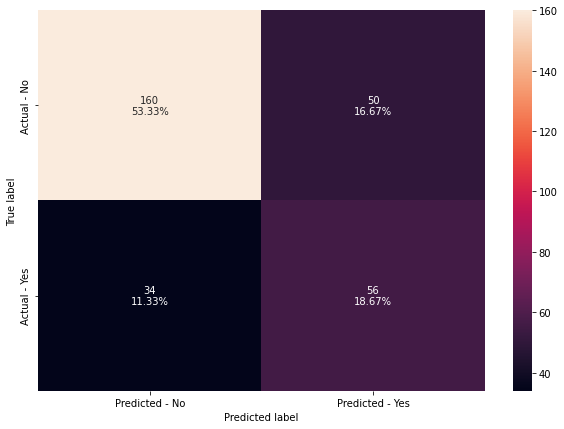

In [47]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

Observation:
1. The confusion matrix has less false positives. 
2. The f-1 score is still too low.
3. The model did not improve much. 


## Stacking Classifier

In [48]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_depth=25,
                                                       max_features='sqrt',
                                                       min_samples_split=12,
                                                       n_estimators=70,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=250,
                                                 

Accuracy on training set :  0.9271428571428572
Accuracy on test set :  0.7133333333333334
Recall on training set :  0.9666666666666667
Recall on test set :  0.6555555555555556
Precision on training set :  0.8218623481781376
Precision on test set :  0.5175438596491229
F1-Score on training set :  0.8884026258205688
F1-Score on test set :  0.5784313725490198


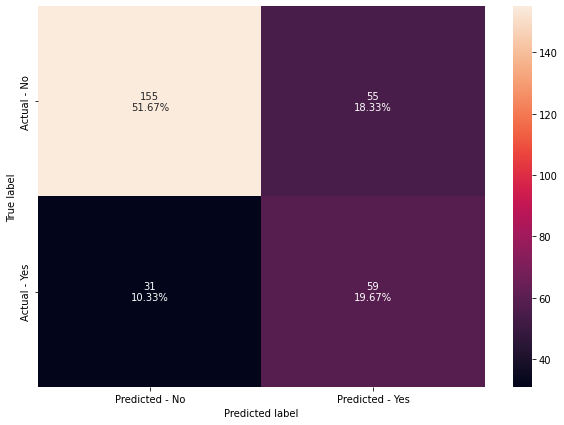

In [58]:
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)

Observation:
1. The stacking classifier is a little more overfit than the previous model.
2. The confusion matrix shows the model is better at predicting an individual will not default, than it is at predicting they will default.


## Comparing all models

In [50]:
# defining list of models
models = [d_tree, dtree_estimator,rf_estimator, rf_tuned, bagging_classifier,bagging_estimator_tuned,
          ab_classifier, abc_tuned, gb_classifier, gbc_tuned, xgb_classifier,xgb_tuned, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [51]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'Bagging Classifier','Bagging Classifier Tuned','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
3,Tuned Random Forest,0.881429,0.713333,0.980952,0.711111,0.722807,0.516129,0.832323,0.598131
1,Tuned Decision Tree,0.632857,0.640000,0.833333,0.844444,0.440806,0.447059,0.576606,0.584615
12,Stacking Classifier,0.927143,0.713333,0.966667,0.655556,0.821862,0.517544,0.888403,0.578431
11,Tuned XGBoost Classifier,0.887143,0.720000,0.861905,0.622222,0.783550,0.528302,0.820862,0.571429
6,AdaBoost Classifier,0.800000,0.740000,0.557143,0.522222,0.713415,0.573171,0.625668,0.546512
9,Tuned Gradient Boosting Classifier,0.974286,0.750000,0.919048,0.477778,0.994845,0.605634,0.955446,0.534161
7,Tuned AdaBoost Classifier,0.874286,0.703333,0.685714,0.477778,0.867470,0.505882,0.765957,0.491429
10,XGBoost Classifier,0.880000,0.746667,0.652381,0.400000,0.925676,0.620690,0.765363,0.486486
5,Bagging Classifier Tuned,0.978571,0.750000,0.928571,0.388889,1.000000,0.636364,0.962963,0.482759
2,Random Forest,1.000000,0.763333,1.000000,0.344444,1.000000,0.720930,1.000000,0.466165


Observation:
1. The tuned random forest has given the hgihest test f1-score.  
2. Tuned decision tree is giving the second highest f1-score on the test data, and also has less distance between the f-1 training and test set scores.


### Feature importance of Tuned Random Forest

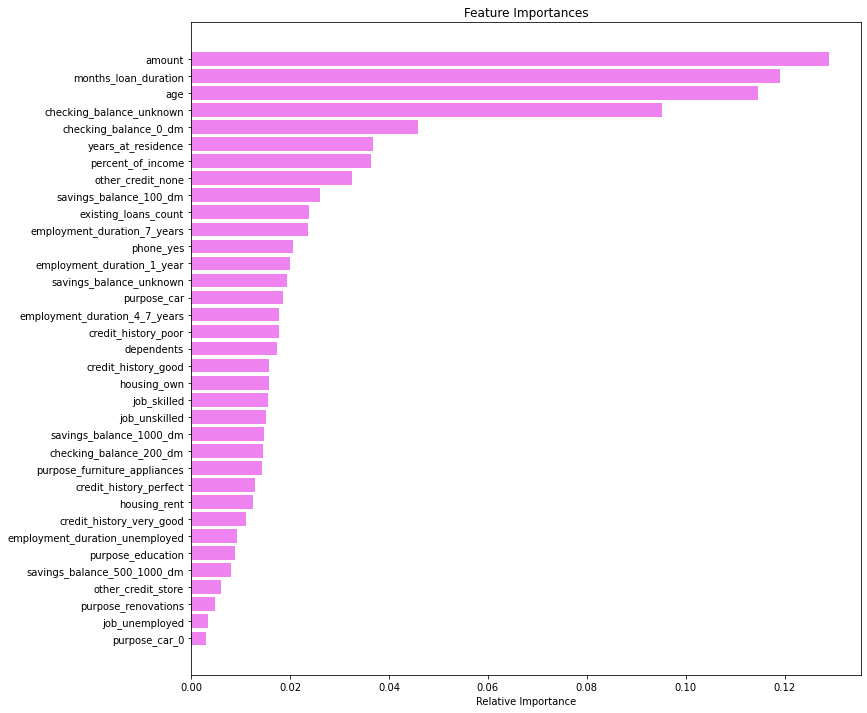

In [52]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Observation:
1. Amount is the most important feature in identifying default or no-default status.
2. Purpose is the least important feature. 

# Conclusion:

1. As we can see individuals with the following features are less likely to default: 
    - Lower loan amount.
    - Lower loan duration. 
    - Older in age
  
2. The amount an individual's loan is, is the most important factor when predicting default or non-default.  
3. Based on the results of the models' comparision, the tuned random forest model can be used to predict defaulters and non-defaulters. 


### Citations:
1. Dr.DeBary Oct 24 Lecture
2. Dr. DeBary Oct 31 Lecture
3. dataset info https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)